## 1.  IMPORTATION OF LIBRARIES

In [183]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import missingno as msn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error, mean_squared_error
from scipy import stats

# To change scientific numbers to float
np.set_printoptions(formatter={'float_kind':'{:f}'.format})

## 2. LOADING THE DATA

In [217]:
# code for importing excel file,pandas should read excel file 

raw_data = pd.read_csv(r"C:\Users\P K\Desktop\tetteh_tee_data.csv")

raw_data


,Unnamed: 0,Depth (m),Hole Depth (m),Block Ht. (m),ROP (m/hr),RPM (rpm),WOB Avg (klb),Hookload (klb),Torque (f-kp),Disc (GPM),AnnP (psi),Total SPM (SPM),Flow Out (%),Pit Act (bbl),Pit Chg (bbl)
0,1,1875.0,1875.0,21.25,45.59,146,17.3,150.6,7.44,606,1818,113.0,21,356,-0.9
1,2,1875.5,1875.5,20.75,47.61,145,17.5,150.3,7.78,604,1815,112.0,21,355,-1.0
2,3,1876.0,1876.0,20.25,43.81,146,15.9,152.0,7.21,605,1812,113.0,21,354,-1.0
3,4,1876.5,1876.5,19.75,17.18,146,5.5,163.9,8.45,601,1812,110.0,21,354,0.0
4,5,1877.0,1877.0,19.25,14.79,147,16.8,150.4,8.42,603,1812,101.0,20,354,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,76,1912.5,1912.5,13.50,15.23,72,8.9,153.3,5.04,625,1875,79.0,13,371,0.0
76,77,1913.0,1913.0,13.00,10.17,71,15.0,148.5,5.35,624,1872,78.0,12,370,-1.0
77,78,1913.5,1913.5,12.50,9.30,73,3.6,159.8,4.70,587,1764,71.0,11,334,-36.0
78,79,1914.0,1914.0,12.00,8.33,73,1.8,161.3,4.72,588,1764,71.0,11,334,0.0


## 3.  DATA PREPROCESSING

In [218]:
raw_data.drop(columns=['Unnamed: 0'], inplace=True)
raw_data

,Depth (m),Hole Depth (m),Block Ht. (m),ROP (m/hr),RPM (rpm),WOB Avg (klb),Hookload (klb),Torque (f-kp),Disc (GPM),AnnP (psi),Total SPM (SPM),Flow Out (%),Pit Act (bbl),Pit Chg (bbl)
0,1875.0,1875.0,21.25,45.59,146,17.3,150.6,7.44,606,1818,113.0,21,356,-0.9
1,1875.5,1875.5,20.75,47.61,145,17.5,150.3,7.78,604,1815,112.0,21,355,-1.0
2,1876.0,1876.0,20.25,43.81,146,15.9,152.0,7.21,605,1812,113.0,21,354,-1.0
3,1876.5,1876.5,19.75,17.18,146,5.5,163.9,8.45,601,1812,110.0,21,354,0.0
4,1877.0,1877.0,19.25,14.79,147,16.8,150.4,8.42,603,1812,101.0,20,354,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,1912.5,1912.5,13.50,15.23,72,8.9,153.3,5.04,625,1875,79.0,13,371,0.0
76,1913.0,1913.0,13.00,10.17,71,15.0,148.5,5.35,624,1872,78.0,12,370,-1.0
77,1913.5,1913.5,12.50,9.30,73,3.6,159.8,4.70,587,1764,71.0,11,334,-36.0
78,1914.0,1914.0,12.00,8.33,73,1.8,161.3,4.72,588,1764,71.0,11,334,0.0


In [219]:
# VISUALIZING NAN VALUES

<AxesSubplot:>

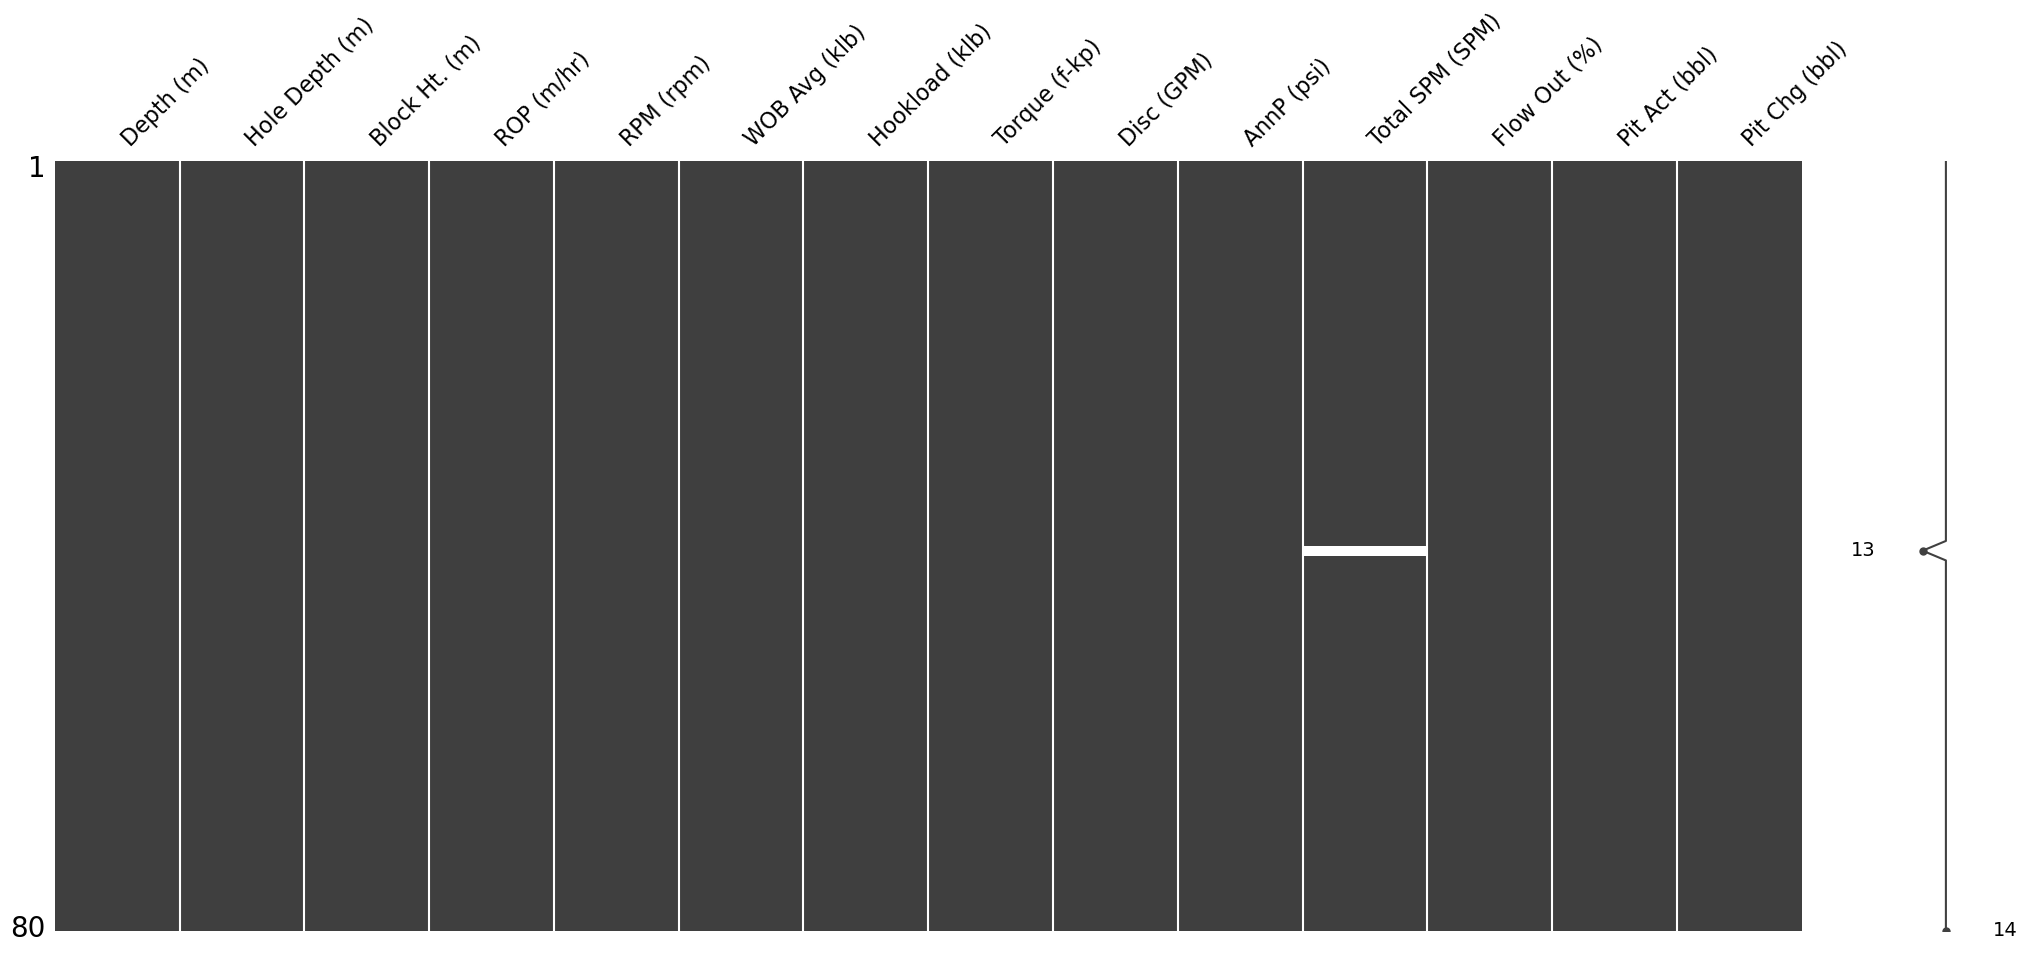

In [186]:
msn.matrix(raw_data)

In [187]:
raw_data.isna().sum()

Depth (m)          0
Hole Depth (m)     0
Block Ht. (m)      0
ROP (m/hr)         0
RPM (rpm)          0
WOB Avg (klb)      0
Hookload (klb)     0
Torque (f-kp)      0
Disc (GPM)         0
AnnP (psi)         0
Total SPM (SPM)    1
Flow Out (%)       0
Pit Act (bbl)      0
Pit Chg (bbl)      0
dtype: int64

In [188]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Depth (m)        80 non-null     float64
 1   Hole Depth (m)   80 non-null     float64
 2   Block Ht. (m)    80 non-null     float64
 3   ROP (m/hr)       80 non-null     float64
 4   RPM (rpm)        80 non-null     int64  
 5   WOB Avg (klb)    80 non-null     float64
 6   Hookload (klb)   80 non-null     float64
 7   Torque (f-kp)    80 non-null     float64
 8   Disc (GPM)       80 non-null     int64  
 9   AnnP (psi)       80 non-null     int64  
 10  Total SPM (SPM)  79 non-null     float64
 11  Flow Out (%)     80 non-null     int64  
 12  Pit Act (bbl)    80 non-null     int64  
 13  Pit Chg (bbl)    80 non-null     float64
dtypes: float64(9), int64(5)
memory usage: 8.9 KB


In [189]:
raw_data.columns

Index(['Depth (m)', 'Hole Depth (m)', 'Block Ht. (m)', 'ROP (m/hr)',
       'RPM (rpm)', 'WOB Avg (klb)', 'Hookload (klb)', 'Torque (f-kp)',
       'Disc (GPM)', 'AnnP (psi)', 'Total SPM (SPM)', 'Flow Out (%)',
       'Pit Act (bbl)', 'Pit Chg (bbl)'],
      dtype='object')

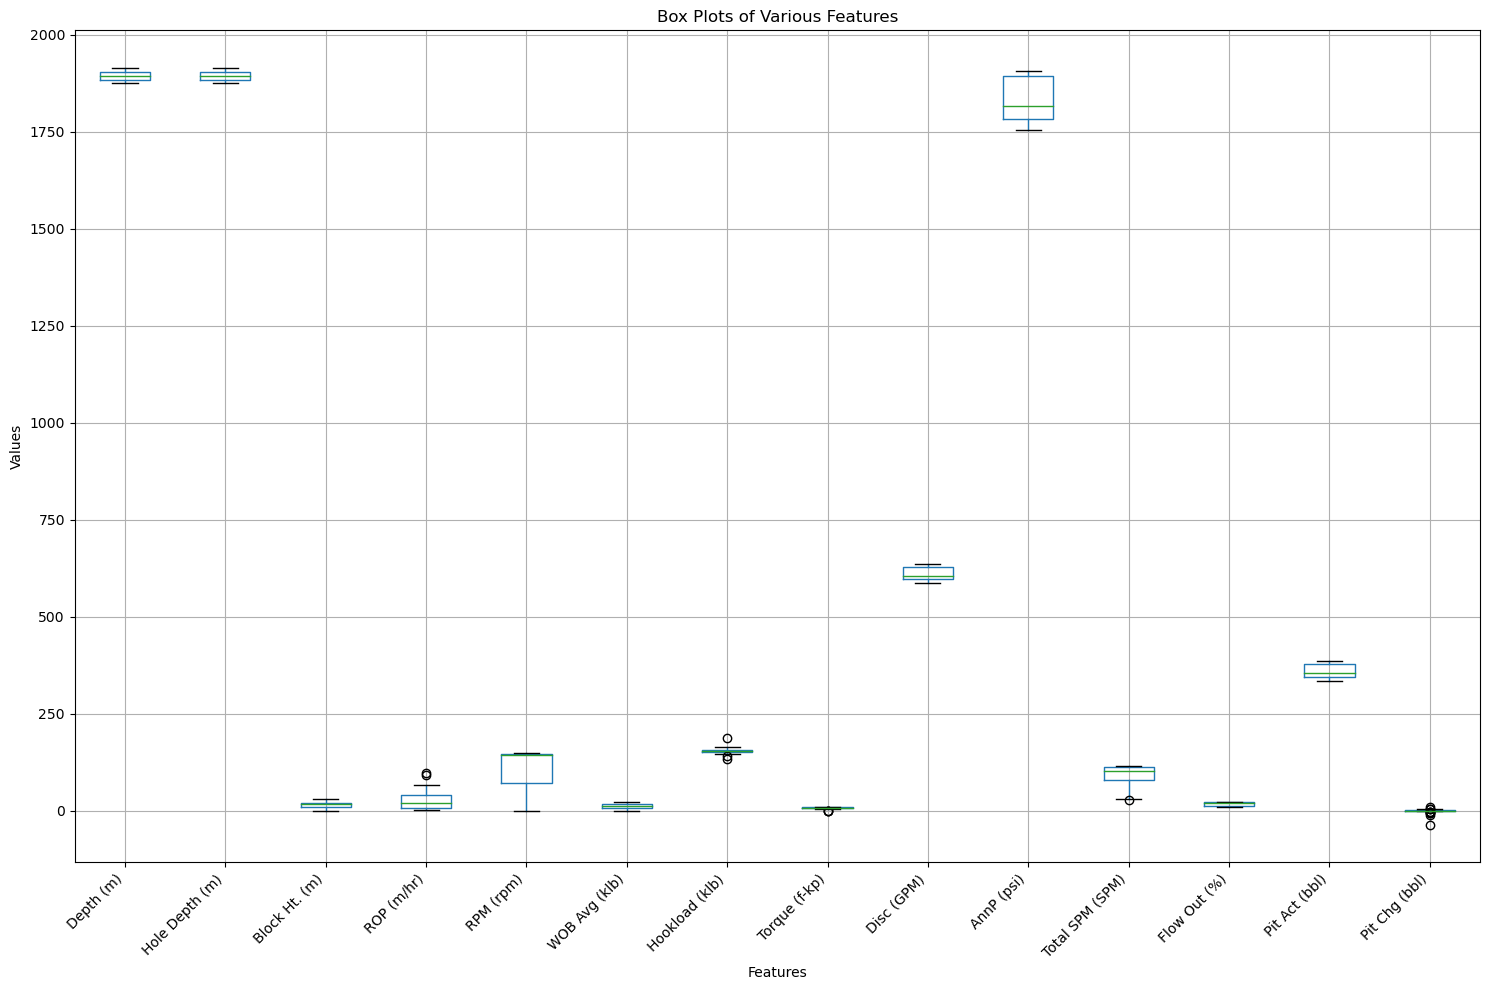

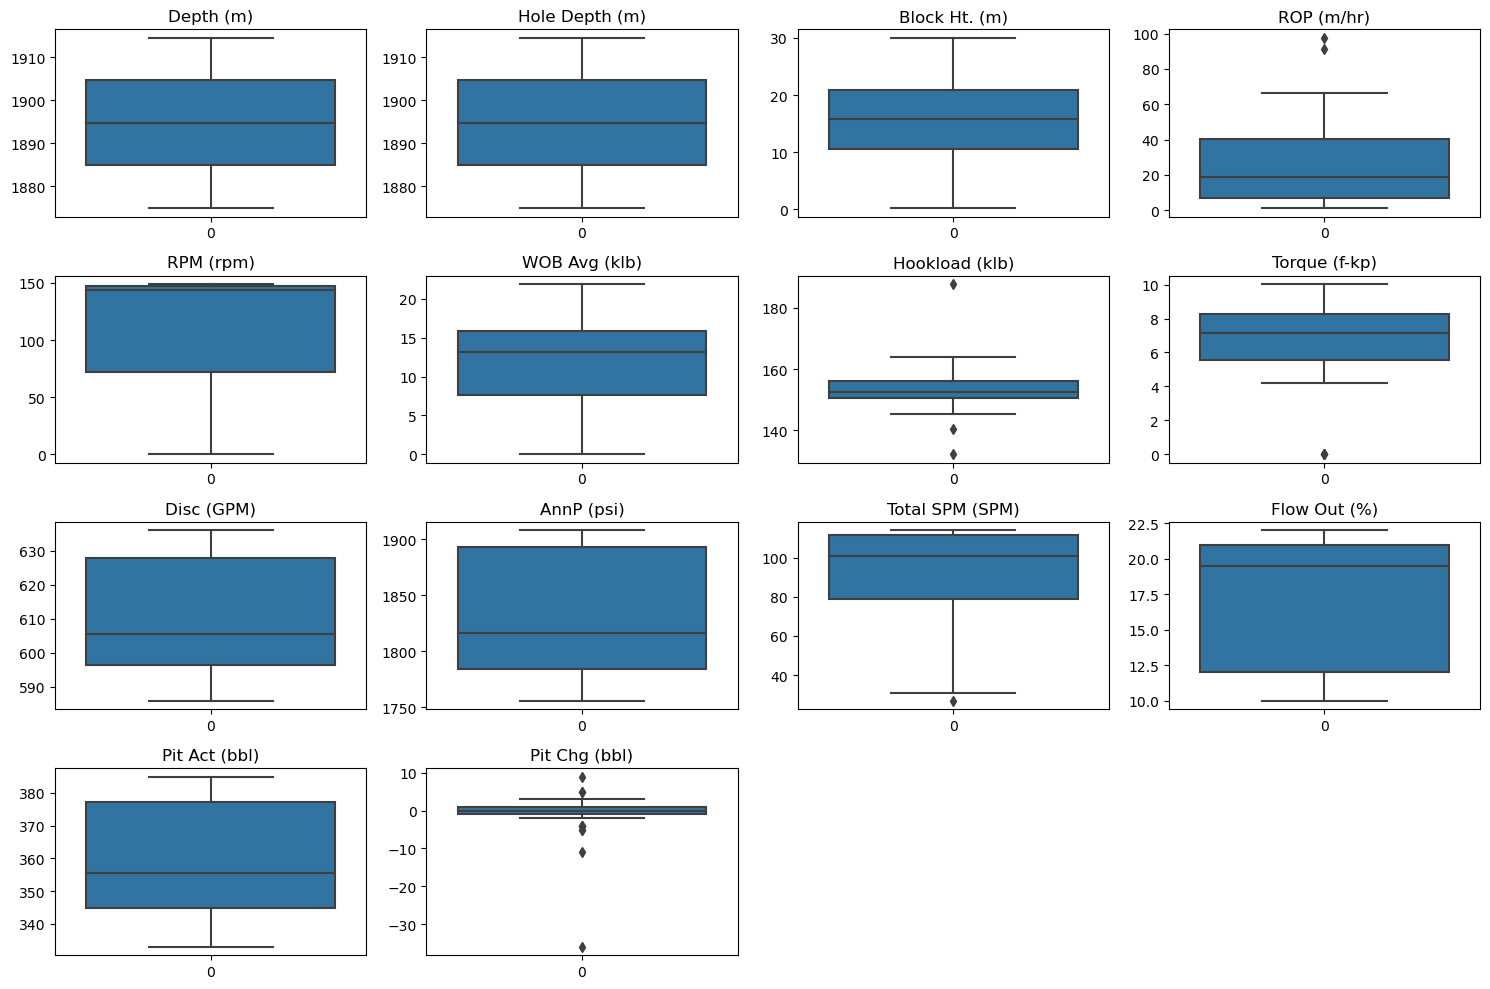

In [176]:
# Example columns list
columns = ['Depth (m)', 'Hole Depth (m)', 'Block Ht. (m)', 'ROP (m/hr)',
       'RPM (rpm)', 'WOB Avg (klb)', 'Hookload (klb)', 'Torque (f-kp)',
       'Disc (GPM)', 'AnnP (psi)', 'Total SPM (SPM)', 'Flow Out (%)',
       'Pit Act (bbl)', 'Pit Chg (bbl)']

# Creating box plots for each feature
plt.figure(figsize=(15, 10))
raw_data.boxplot(column=columns)
plt.title('Box Plots of Various Features')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.xlabel('Features')
plt.ylabel('Values')
plt.grid(True)
plt.tight_layout()  # Adjust layout for better fit
plt.show()

# Alternatively, using seaborn for more customization
plt.figure(figsize=(15, 10))
for i, col in enumerate(columns, 1):
    plt.subplot(4, 4, i)  # Adjust rows and columns as needed
    sns.boxplot(data=raw_data[col])
    plt.title(col)
    plt.xlabel('')
    plt.ylabel('')
plt.tight_layout()
plt.show()

## FEATURE ENGINEERING

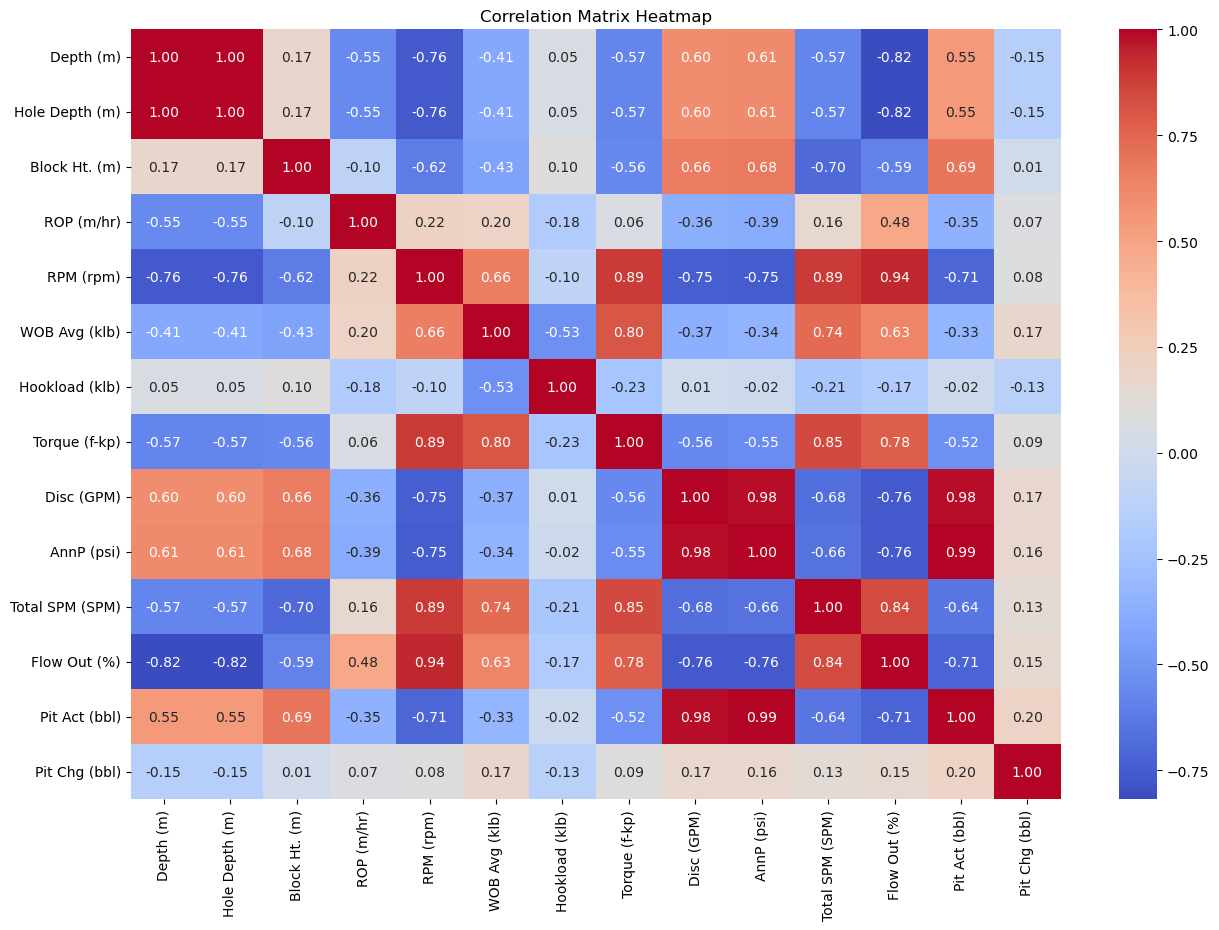

In [181]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
hm = raw_data[['Depth (m)', 'Hole Depth (m)', 'Block Ht. (m)', 'ROP (m/hr)',
       'RPM (rpm)', 'WOB Avg (klb)', 'Hookload (klb)', 'Torque (f-kp)',
       'Disc (GPM)', 'AnnP (psi)', 'Total SPM (SPM)', 'Flow Out (%)',
       'Pit Act (bbl)', 'Pit Chg (bbl)']].corr()

# Set up the matplotlib figure
plt.figure(figsize=(15, 10))  # You can adjust the size as needed

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(hm, annot=True, cmap='coolwarm', fmt='.2f')

# Add a title if desired
plt.title('Correlation Matrix Heatmap')

# Show the plot
plt.show()


In [194]:
raw_data['ΔAnnP'] = raw_data['AnnP (psi)'].diff()
raw_data

,Depth (m),Hole Depth (m),Block Ht. (m),ROP (m/hr),RPM (rpm),WOB Avg (klb),Hookload (klb),Torque (f-kp),Disc (GPM),AnnP (psi),Total SPM (SPM),Flow Out (%),Pit Act (bbl),Pit Chg (bbl),ΔAnnP
0,1875.0,1875.0,21.25,45.59,146,17.3,150.6,7.44,606,1818,113.0,21,356,-0.9,NaN
1,1875.5,1875.5,20.75,47.61,145,17.5,150.3,7.78,604,1815,112.0,21,355,-1.0,-3.0
2,1876.0,1876.0,20.25,43.81,146,15.9,152.0,7.21,605,1812,113.0,21,354,-1.0,-3.0
3,1876.5,1876.5,19.75,17.18,146,5.5,163.9,8.45,601,1812,110.0,21,354,0.0,0.0
4,1877.0,1877.0,19.25,14.79,147,16.8,150.4,8.42,603,1812,101.0,20,354,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,1912.5,1912.5,13.50,15.23,72,8.9,153.3,5.04,625,1875,79.0,13,371,0.0,0.0
76,1913.0,1913.0,13.00,10.17,71,15.0,148.5,5.35,624,1872,78.0,12,370,-1.0,-3.0
77,1913.5,1913.5,12.50,9.30,73,3.6,159.8,4.70,587,1764,71.0,11,334,-36.0,-108.0
78,1914.0,1914.0,12.00,8.33,73,1.8,161.3,4.72,588,1764,71.0,11,334,0.0,0.0


In [199]:
cleaned_data = raw_data.dropna()
cleaned_data

,Depth (m),Hole Depth (m),Block Ht. (m),ROP (m/hr),RPM (rpm),WOB Avg (klb),Hookload (klb),Torque (f-kp),Disc (GPM),AnnP (psi),Total SPM (SPM),Flow Out (%),Pit Act (bbl),Pit Chg (bbl),ΔAnnP
1,1875.5,1875.5,20.75,47.61,145,17.5,150.3,7.78,604,1815,112.0,21,355,-1.0,-3.0
2,1876.0,1876.0,20.25,43.81,146,15.9,152.0,7.21,605,1812,113.0,21,354,-1.0,-3.0
3,1876.5,1876.5,19.75,17.18,146,5.5,163.9,8.45,601,1812,110.0,21,354,0.0,0.0
4,1877.0,1877.0,19.25,14.79,147,16.8,150.4,8.42,603,1812,101.0,20,354,0.0,0.0
5,1877.5,1877.5,18.75,33.25,149,15.9,151.4,8.28,604,1812,101.0,20,354,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,1912.5,1912.5,13.50,15.23,72,8.9,153.3,5.04,625,1875,79.0,13,371,0.0,0.0
76,1913.0,1913.0,13.00,10.17,71,15.0,148.5,5.35,624,1872,78.0,12,370,-1.0,-3.0
77,1913.5,1913.5,12.50,9.30,73,3.6,159.8,4.70,587,1764,71.0,11,334,-36.0,-108.0
78,1914.0,1914.0,12.00,8.33,73,1.8,161.3,4.72,588,1764,71.0,11,334,0.0,0.0


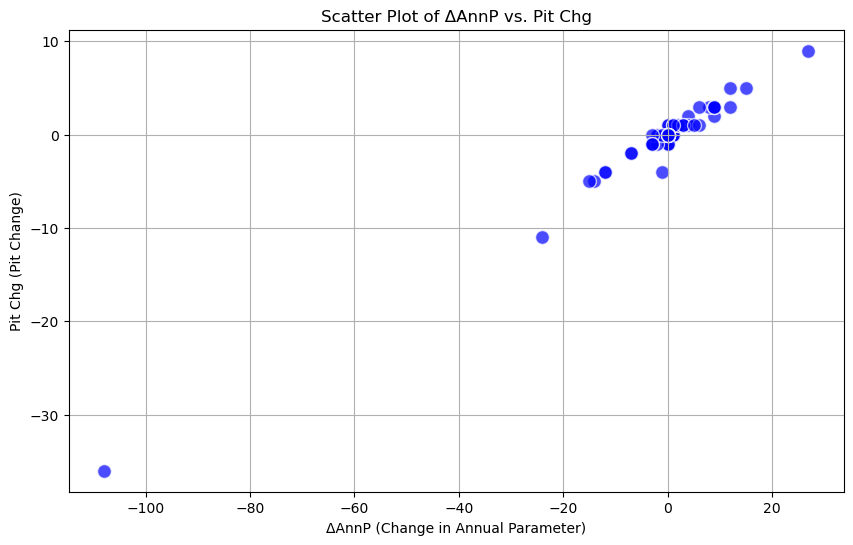

In [200]:
import matplotlib.pyplot as plt

# Assuming raw_data is your DataFrame with 'ΔAnnP' and 'Pit Chg' columns

plt.figure(figsize=(10, 6))
plt.scatter(cleaned_data['ΔAnnP'], cleaned_data['Pit Chg (bbl)'], alpha=0.7, c='blue', edgecolors='w', s=100)
plt.title('Scatter Plot of ΔAnnP vs. Pit Chg')
plt.xlabel('ΔAnnP (Change in Annual Parameter)')
plt.ylabel('Pit Chg (Pit Change)')
plt.grid(True)
plt.show()


In [204]:
# Standardization

from sklearn.preprocessing import StandardScaler

# Define the features to standardize
scale_vars = ['ΔAnnP']

# Create a StandardScaler object
scaler = StandardScaler()

# Standardize the specified features
cleaned_data[scale_vars] = scaler.fit_transform(cleaned_data[scale_vars])

# Print the standardized DataFrame
cleaned_data.head()

C:\Users\P K\AppData\Local\Temp\ipykernel_1644\881865027.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data[scale_vars] = scaler.fit_transform(cleaned_data[scale_vars])


,Depth (m),Hole Depth (m),Block Ht. (m),ROP (m/hr),RPM (rpm),WOB Avg (klb),Hookload (klb),Torque (f-kp),Disc (GPM),AnnP (psi),Total SPM (SPM),Flow Out (%),Pit Act (bbl),Pit Chg (bbl),ΔAnnP
1,1875.5,1875.5,20.75,47.61,145,17.5,150.3,7.78,604,1815,112.0,21,355,-1.0,-0.158226
2,1876.0,1876.0,20.25,43.81,146,15.9,152.0,7.21,605,1812,113.0,21,354,-1.0,-0.158226
3,1876.5,1876.5,19.75,17.18,146,5.5,163.9,8.45,601,1812,110.0,21,354,0.0,0.058294
4,1877.0,1877.0,19.25,14.79,147,16.8,150.4,8.42,603,1812,101.0,20,354,0.0,0.058294
5,1877.5,1877.5,18.75,33.25,149,15.9,151.4,8.28,604,1812,101.0,20,354,0.0,0.058294


In [207]:
cleaned_data.columns

Index(['Depth (m)', 'Hole Depth (m)', 'Block Ht. (m)', 'ROP (m/hr)',
       'RPM (rpm)', 'WOB Avg (klb)', 'Hookload (klb)', 'Torque (f-kp)',
       'Disc (GPM)', 'AnnP (psi)', 'Total SPM (SPM)', 'Flow Out (%)',
       'Pit Act (bbl)', 'Pit Chg (bbl)', 'ΔAnnP'],
      dtype='object')

## DATA SEPARATION

In [211]:
X = cleaned_data[['ΔAnnP']]  # X-values (features)

y = cleaned_data['Pit Chg (bbl)']  # y-values (target/output)


## DATA SPLITTING

In [224]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)



## MODEL IMPLEMENTATION

## 1. LASSO REGRESSION

In [225]:
# Initialize the Lasso Regressor with an alpha value
lasso = Lasso(alpha=0.1, random_state=42)  # You can adjust the alpha parameter

# Train the model
lasso.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lasso.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


Mean Squared Error: 0.13968831934813578
R^2 Score: 0.9593171675163563


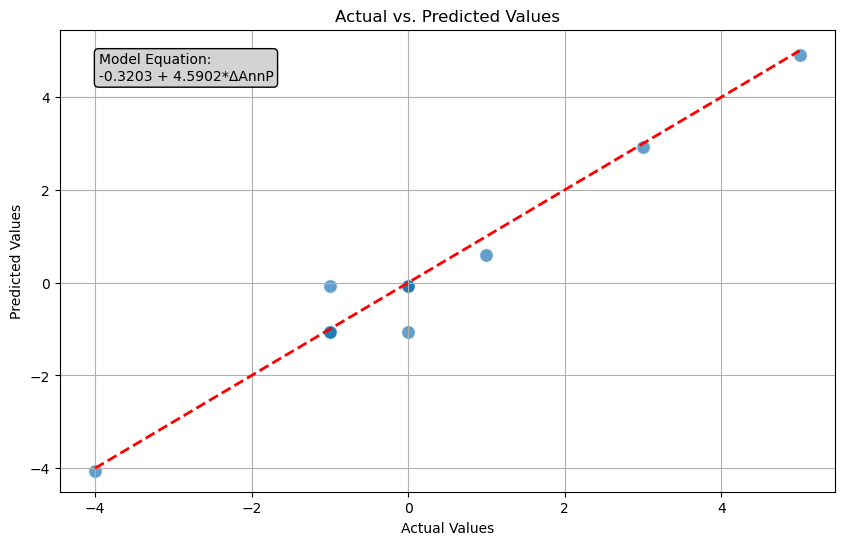

In [226]:
import matplotlib.pyplot as plt

# Scatter plot of actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, edgecolors='w', s=100)
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Line representing perfect predictions
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)

# Annotate the plot with the equation of the model
plt.text(
    0.05, 0.95,  # Position of the text (relative to the plot)
    f"Model Equation:\n{equation}",
    transform=plt.gca().transAxes,
    fontsize=10,
    verticalalignment='top',
    bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="lightgrey")
)

# Show plot
plt.grid(True)
plt.show()


In [229]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Initialize the Ridge Regressor with an alpha value
ridge = Ridge(alpha=1.0, random_state=42)  # You can adjust the alpha parameter

# Train the model
ridge.fit(X_train, y_train)

# Make predictions on the test set
y_pred_ridge = ridge.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred_ridge)
r2 = r2_score(y_test, y_pred_ridge)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Extract the coefficients and intercept
coefficients = ridge.coef_
intercept = ridge.intercept_

# Print the equation of the Ridge Regression model
features = X_train.columns
equation = " + ".join([f"{coef:.4f}*{feat}" for coef, feat in zip(coefficients, features)])
equation = f"{intercept:.4f} + " + equation

print("Equation of the Ridge Regression model:")
print(equation)

Mean Squared Error: 0.13973856712673877
R^2 Score: 0.9593025333510294
Equation of the Ridge Regression model:
-0.3391 + 4.6180*ΔAnnP


Mean Squared Error: 0.13973856712673877
R^2 Score: 0.9593025333510294
Equation of the Ridge Regression model:
-0.3391 + 4.6180*ΔAnnP


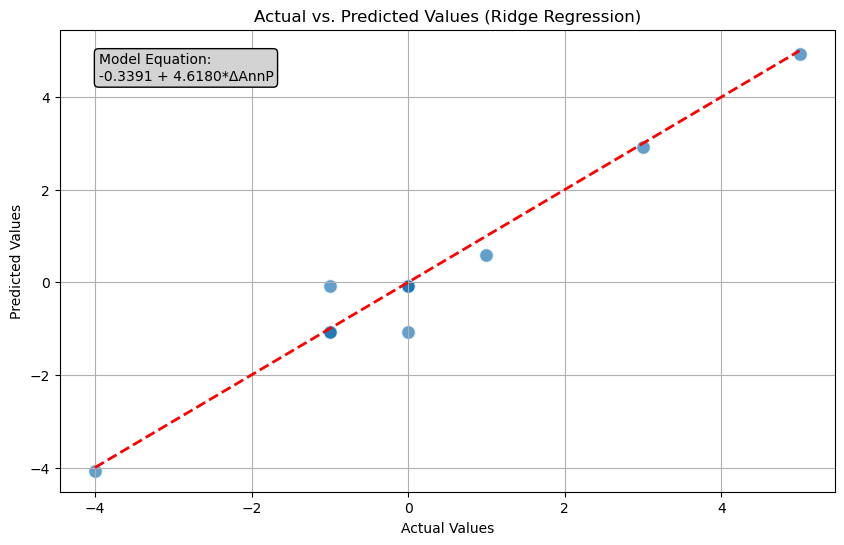

In [230]:
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Initialize the Ridge Regressor with an alpha value
ridge = Ridge(alpha=1.0, random_state=42)  # You can adjust the alpha parameter

# Train the model
ridge.fit(X_train, y_train)

# Make predictions on the test set
y_pred_ridge = ridge.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred_ridge)
r2 = r2_score(y_test, y_pred_ridge)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Extract the coefficients and intercept
coefficients = ridge.coef_
intercept = ridge.intercept_

# Print the equation of the Ridge Regression model
features = X_train.columns
equation = " + ".join([f"{coef:.4f}*{feat}" for coef, feat in zip(coefficients, features)])
equation = f"{intercept:.4f} + " + equation

print("Equation of the Ridge Regression model:")
print(equation)

# Scatter plot of actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_ridge, alpha=0.7, edgecolors='w', s=100)
plt.title('Actual vs. Predicted Values (Ridge Regression)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Line representing perfect predictions
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)

# Annotate the plot with the equation of the model
plt.text(
    0.05, 0.95,  # Position of the text (relative to the plot)
    f"Model Equation:\n{equation}",
    transform=plt.gca().transAxes,
    fontsize=10,
    verticalalignment='top',
    bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="lightgrey")
)

# Show plot
plt.grid(True)
plt.show()

Mean Squared Error: 0.14072529984278576
R^2 Score: 0.9590151572699054
Equation of the Linear Regression model:
-0.3381 + 4.6793*ΔAnnP


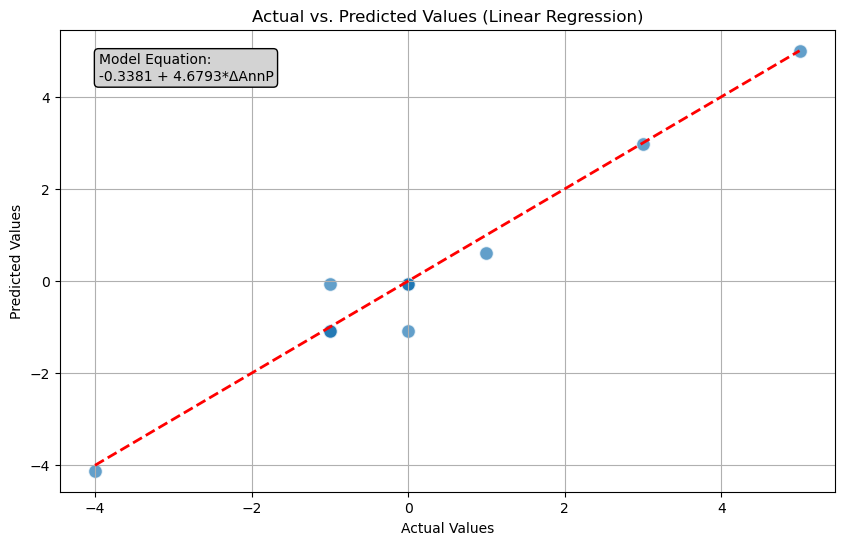

In [231]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Initialize the Linear Regression model
lr = LinearRegression()

# Train the model
lr.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lr = lr.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred_lr)
r2 = r2_score(y_test, y_pred_lr)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Extract the coefficients and intercept
coefficients = lr.coef_
intercept = lr.intercept_

# Print the equation of the Linear Regression model
features = X_train.columns
equation = " + ".join([f"{coef:.4f}*{feat}" for coef, feat in zip(coefficients, features)])
equation = f"{intercept:.4f} + " + equation

print("Equation of the Linear Regression model:")
print(equation)

# Scatter plot of actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.7, edgecolors='w', s=100)
plt.title('Actual vs. Predicted Values (Linear Regression)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Line representing perfect predictions
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)

# Annotate the plot with the equation of the model
plt.text(
    0.05, 0.95,  # Position of the text (relative to the plot)
    f"Model Equation:\n{equation}",
    transform=plt.gca().transAxes,
    fontsize=10,
    verticalalignment='top',
    bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="lightgrey")
)

# Show plot
plt.grid(True)
plt.show()